#Rough Set

In [40]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('data_air (1).csv',sep=';')
df

BOD     DO    TSS
0   2.84   8.67  10.80
1   2.98   8.77  16.20
2   3.19   9.37  10.35
3   2.51   8.29   7.70
4   5.38   8.48   8.50
..   ...    ...    ...
64  4.11  10.34  17.87
65  2.67  10.02  14.12
66  4.50   8.10  10.50
67  4.70   7.20   7.80
68  4.56   7.10   9.12

[69 rows x 3 columns]

In [42]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['Class'].value_counts()

In [43]:
#Encoding dengan data sedikit
#cleanup_nums = {"Class":     {"adi": 1, "car": 2, "mas":3, "gla":4, "fad":5, "con":6 }}
#df = df.replace(cleanup_nums)
#df.head()

In [44]:
df1=df.iloc[::,:-1]     #memisahkan antara variabel x dan y
df1

BOD     DO
0   2.84   8.67
1   2.98   8.77
2   3.19   9.37
3   2.51   8.29
4   5.38   8.48
..   ...    ...
64  4.11  10.34
65  2.67  10.02
66  4.50   8.10
67  4.70   7.20
68  4.56   7.10

[69 rows x 2 columns]

#Core and Reduct

In [45]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [46]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['TSS']=faktor.iloc[::,-1]
    return df_CR

In [47]:
df_CR=Core_and_Reduct(df)
df_CR.head()

BOD    DO    TSS
0  2.84  8.67  10.80
1  2.98  8.77  16.20
2  3.19  9.37  10.35
3  2.51  8.29   7.70
4  5.38  8.48   8.50

In [48]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [49]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

In [50]:
df_tsk=pd.read_csv('hasilrougset.csv',sep=';')
df_tsk.describe()

BOD         DO        TSS
count  69.000000  69.000000  69.000000
mean    4.079275   8.533333  10.684493
std     1.205879   0.938363   4.448331
min     2.070000   7.080000   3.550000
25%     3.080000   7.780000   6.600000
50%     4.040000   8.410000  10.400000
75%     4.970000   9.120000  14.980000
max     6.690000  10.420000  18.600000

In [51]:
df_tsk

BOD     DO    TSS
0   2.84   8.67  10.80
1   2.98   8.77  16.20
2   3.19   9.37  10.35
3   2.51   8.29   7.70
4   5.38   8.48   8.50
..   ...    ...    ...
64  4.11  10.34  17.87
65  2.67  10.02  14.12
66  4.50   8.10  10.50
67  4.70   7.20   7.80
68  4.56   7.10   9.12

[69 rows x 3 columns]

In [52]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

BOD    0
DO     0
TSS    0
dtype: int64

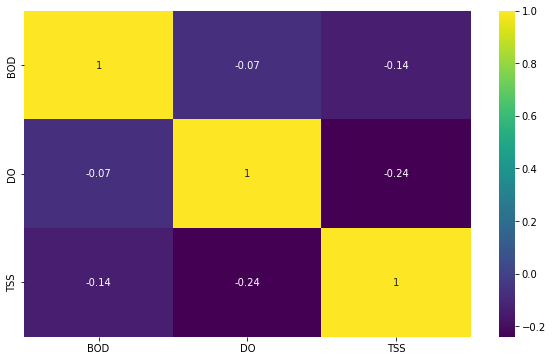

In [53]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

In [54]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [55]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[x_i]

    return hasil

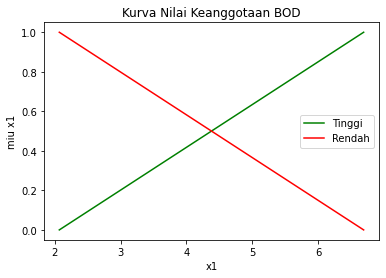

In [56]:
# Pembentukan Himpunan Fuzzy BOD [fungsi buat sendiri]
x_bod= np.arange(2.07, 6.69, 0.01) # Semesta Pembicaraan
amb_tinggi = [2.07, 6.69, 6.69]
amb_rendah = [2.07, 2.07, 6.69]

miu_bod_tinggi = fungsi_segitiga(x_bod, amb_tinggi)
miu_bod_rendah = fungsi_segitiga(x_bod, amb_rendah)

import matplotlib.pyplot as plt
plt.plot(x_bod, miu_bod_tinggi, label = "Tinggi", color='green')
plt.plot(x_bod, miu_bod_rendah, label = "Rendah", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan BOD')
plt.legend()
plt.show()

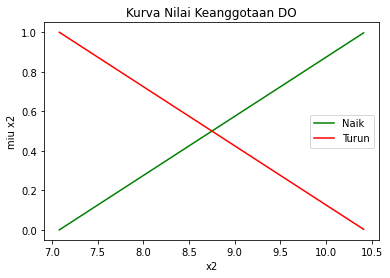

In [57]:
# Pembentukan Himpunan Fuzzy DO [fungsi buat sendiri]
x_do= np.arange(7.08, 10.42, 0.01) # Semesta Pembicaraan
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]

miu_do_naik  = fungsi_segitiga(x_do, amb_naik)
miu_do_turun = fungsi_segitiga(x_do, amb_turun)

import matplotlib.pyplot as plt
plt.plot(x_do, miu_do_naik,  label = "Naik",  color='green')
plt.plot(x_do, miu_do_turun, label = "Turun", color='red')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan DO')
plt.legend()
plt.show()

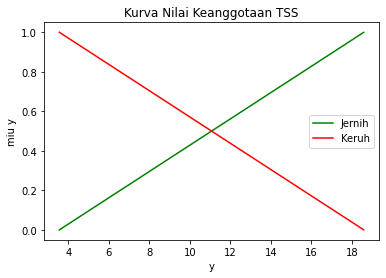

In [58]:
# Pembentukan Himpunan Fuzzy TSS [fungsi buat sendiri]
x_tss= np.arange(3.55, 18.60, 0.01) # Semesta Pembicaraan
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh  = [3.55,  3.55, 18.60]

miu_tss_jernih  = fungsi_segitiga(x_tss, amb_jernih)
miu_tss_keruh   = fungsi_segitiga(x_tss, amb_keruh)

import matplotlib.pyplot as plt
plt.plot(x_tss, miu_tss_jernih,  label = "Jernih",  color='green')
plt.plot(x_tss, miu_tss_keruh, label = "Keruh", color='red')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan TSS')
plt.legend()
plt.show()

In [59]:
def fuzzyfikasi(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil=0
    if x < batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [60]:
x_bod= np.arange(2.07, 6.69, 0.01)
amb_tinggi = [2.07, 6.69, 6.69]
amb_rendah = [2.07, 2.07, 6.69]

fuzzifikasi_BOD=[]
miu_BOD=[]
for i in df.BOD:
    hasil=fuzzyfikasi(x_bod, amb_tinggi, amb_rendah, i, "Rendah", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_BOD.append(fuzz)
    miu_BOD.append(m)
    
len(fuzzifikasi_BOD)

4.379999999999951
{2.07: 0.0, 2.08: 0.002164502164502118, 2.09: 0.004329004329004236, 2.1: 0.006493506493506353, 2.11: 0.008658008658008472, 2.12: 0.01082251082251059, 2.13: 0.012987012987012707, 2.14: 0.015151515151514826, 2.15: 0.017316017316016945, 2.16: 0.01948051948051906, 2.17: 0.02164502164502118, 2.18: 0.023809523809523298, 2.19: 0.025974025974025414, 2.2: 0.028138528138527533, 2.21: 0.03030303030302965, 2.22: 0.03246753246753177, 2.23: 0.03463203463203389, 2.24: 0.036796536796536, 2.25: 0.03896103896103812, 2.26: 0.04112554112554024, 2.27: 0.04329004329004236, 2.28: 0.04545454545454448, 2.29: 0.047619047619046596, 2.3: 0.04978354978354871, 2.31: 0.05194805194805083, 2.32: 0.054112554112552946, 2.33: 0.056277056277055065, 2.34: 0.058441558441557184, 2.35: 0.0606060606060593, 2.36: 0.06277056277056142, 2.37: 0.06493506493506354, 2.38: 0.06709956709956566, 2.39: 0.06926406926406778, 2.4: 0.07142857142856988, 2.41: 0.073593073593072, 2.42: 0.07575757575757412, 2.43: 0.077922077922

69

In [61]:
x_do= np.arange(7.08, 10.43, 0.01) 
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]
    
fuzzifikasi_DO=[]
miu_DO=[]
for i in df.DO:
    hasil=fuzzyfikasi(x_do, amb_naik, amb_turun, i, "Turun", "Naik")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_DO.append(fuzz)
    miu_DO.append(m)
len(fuzzifikasi_DO)

8.749999999999964
{7.08: 0.0, 7.09: 0.0029940119760478406, 7.1: 0.005988023952095681, 7.11: 0.008982035928143521, 7.12: 0.011976047904191362, 7.13: 0.014970059880239202, 7.14: 0.017964071856287043, 7.15: 0.020958083832334884, 7.16: 0.023952095808382725, 7.17: 0.026946107784430566, 7.18: 0.029940119760478404, 7.19: 0.03293413173652625, 7.2: 0.035928143712574086, 7.21: 0.03892215568862192, 7.22: 0.04191616766466977, 7.23: 0.044910179640717605, 7.24: 0.04790419161676545, 7.25: 0.05089820359281329, 7.26: 0.05389221556886113, 7.27: 0.05688622754490897, 7.28: 0.05988023952095681, 7.29: 0.06287425149700465, 7.3: 0.0658682634730525, 7.31: 0.06886227544910033, 7.32: 0.07185628742514817, 7.33: 0.07485029940119602, 7.34: 0.07784431137724385, 7.35: 0.08083832335329169, 7.36: 0.08383233532933954, 7.37: 0.08682634730538738, 7.38: 0.08982035928143521, 7.39: 0.09281437125748306, 7.4: 0.0958083832335309, 7.41: 0.09880239520957873, 7.42: 0.10179640718562658, 7.43: 0.10479041916167442, 7.44: 0.1077844311

69

In [62]:
x_tss= np.arange(3.55, 18.61, 0.01)
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh   = [3.55,  3.55, 18.60]
    
fuzzifikasi_TSS=[]
miu_TSS=[]
for i in df.TSS:
    hasil=fuzzyfikasi(x_tss, amb_jernih, amb_keruh, i, "Keruh", "Jernih")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_TSS.append(fuzz)
    miu_TSS.append(m)
len(fuzzifikasi_TSS)

11.07499999999984
{3.55: 0.0, 3.56: 0.0006644518272425108, 3.57: 0.0013289036544850215, 3.58: 0.001993355481727532, 3.59: 0.002657807308970043, 3.6: 0.0033222591362125535, 3.61: 0.003986710963455064, 3.62: 0.0046511627906975755, 3.63: 0.005315614617940086, 3.64: 0.0059800664451825965, 3.65: 0.006644518272425107, 3.66: 0.007308970099667618, 3.67: 0.007973421926910128, 3.68: 0.008637873754152639, 3.69: 0.009302325581395151, 3.7: 0.009966777408637661, 3.71: 0.010631229235880172, 3.72: 0.011295681063122683, 3.73: 0.011960132890365193, 3.74: 0.012624584717607704, 3.75: 0.013289036544850214, 3.76: 0.013953488372092725, 3.77: 0.014617940199335235, 3.78: 0.015282392026577746, 3.79: 0.015946843853820256, 3.8: 0.016611295681062767, 3.81: 0.017275747508305277, 3.82: 0.017940199335547788, 3.83: 0.018604651162790302, 3.84: 0.019269102990032812, 3.85: 0.019933554817275323, 3.86: 0.020598006644517834, 3.87: 0.021262458471760344, 3.88: 0.021926910299002855, 3.89: 0.022591362126245365, 3.9: 0.023255813

69

In [63]:
df_fuzz = pd.DataFrame({"BOD":df.BOD,
                        "DO":df.DO,
                        "TSS":df.TSS,
                        "BOD_fuzz": fuzzifikasi_BOD,
                       "DO_fuzz": fuzzifikasi_DO,
                       "TSS_fuzz": fuzzifikasi_TSS,
                       "miu_BOD":miu_BOD,
                       "miu_DO":miu_DO,
                       "miu_TSS":miu_TSS,})
df_fuzz

BOD     DO    TSS BOD_fuzz DO_fuzz TSS_fuzz   miu_BOD    miu_DO   miu_TSS
0   2.84   8.67  10.80   Rendah   Turun    Keruh  0.166667  0.476048  0.481728
1   2.98   8.77  16.20   Rendah    Naik   Jernih  0.196970  0.494012  0.159468
2   3.19   9.37  10.35   Rendah    Naik    Keruh  0.242424  0.314371  0.451827
3   2.51   8.29   7.70   Rendah   Turun    Keruh  0.095238  0.362275  0.275748
4   5.38   8.48   8.50   Tinggi   Turun    Keruh  0.283550  0.419162  0.328904
..   ...    ...    ...      ...     ...      ...       ...       ...       ...
64  4.11  10.34  17.87   Rendah    Naik   Jernih  0.441558  0.023952  0.048505
65  2.67  10.02  14.12   Rendah    Naik   Jernih  0.129870  0.119760  0.297674
66  4.50   8.10  10.50   Tinggi   Turun    Keruh  0.474026  0.305389  0.461794
67  4.70   7.20   7.80   Tinggi   Turun    Keruh  0.430736  0.035928  0.282392
68  4.56   7.10   9.12   Tinggi   Turun    Keruh  0.461039  0.005988  0.370100

[69 rows x 9 columns]

# Rule Generation

In [64]:
df_fuzz['Rule'] = "Jika X1 " + df_fuzz['BOD_fuzz'] + " dan X2 " + df_fuzz['DO_fuzz'] + " maka Y " + df_fuzz['TSS_fuzz']
df_fuzz.head()

BOD    DO  ...   miu_TSS                                      Rule
0  2.84  8.67  ...  0.481728  Jika X1 Rendah dan X2 Turun maka Y Keruh
1  2.98  8.77  ...  0.159468  Jika X1 Rendah dan X2 Naik maka Y Jernih
2  3.19  9.37  ...  0.451827   Jika X1 Rendah dan X2 Naik maka Y Keruh
3  2.51  8.29  ...  0.275748  Jika X1 Rendah dan X2 Turun maka Y Keruh
4  5.38  8.48  ...  0.328904  Jika X1 Tinggi dan X2 Turun maka Y Keruh

[5 rows x 10 columns]

In [65]:
df_fuzz['Rule'].value_counts()

Jika X1 Rendah dan X2 Turun maka Y Keruh     10
Jika X1 Rendah dan X2 Naik maka Y Keruh      10
Jika X1 Tinggi dan X2 Naik maka Y Keruh      10
Jika X1 Tinggi dan X2 Turun maka Y Jernih    10
Jika X1 Rendah dan X2 Turun maka Y Jernih    10
Jika X1 Rendah dan X2 Naik maka Y Jernih     10
Jika X1 Tinggi dan X2 Turun maka Y Keruh      9
Name: Rule, dtype: int64

# TSK Prediction

In [66]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [67]:
# Rule 1
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Rendah dan X2 Turun maka Y Keruh"]
index=rule_1.index

data_rule_1=df_fuzz.iloc[index,:3]

X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])

data_rule_1

BOD    DO    TSS
0   2.84  8.67  10.80
3   2.51  8.29   7.70
5   3.50  8.10   6.20
6   2.07  7.49   6.15
11  2.94  7.78   6.25
14  4.10  7.20  10.85
19  3.72  7.90   5.60
21  3.12  8.07   4.25
22  2.24  7.98   6.95
25  3.62  8.38   4.91

In [68]:
data_rule_1.to_csv('hasilrule1.csv') 

###STOKASTIC GRADIENT DESCENT

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [70]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1

Unnamed: 0   BOD    DO    TSS
0           0  2.84  8.67  10.80
1           3  2.51  8.29   7.70
2           5  3.50  8.10   6.20
3           6  2.07  7.49   6.15
4          11  2.94  7.78   6.25
5          14  4.10  7.20  10.85
6          19  3.72  7.90   5.60
7          21  3.12  8.07   4.25
8          22  2.24  7.98   6.95
9          25  3.62  8.38   4.91

In [71]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1

BOD    DO    TSS
0  2.84  8.67  10.80
1  2.51  8.29   7.70
2  3.50  8.10   6.20
3  2.07  7.49   6.15
4  2.94  7.78   6.25
5  4.10  7.20  10.85
6  3.72  7.90   5.60
7  3.12  8.07   4.25
8  2.24  7.98   6.95
9  3.62  8.38   4.91

In [72]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('TSS',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['TSS'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[0.37931034, 1.        ],
       [0.21674877, 0.7414966 ],
       [0.7044335 , 0.6122449 ],
       [0.        , 0.19727891],
       [0.42857143, 0.39455782],
       [1.        , 0.        ],
       [0.81280788, 0.47619048],
       [0.51724138, 0.59183673],
       [0.08374384, 0.53061224],
       [0.7635468 , 0.80272109]])

In [73]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0.99242424, 0.52272727, 0.29545455, 0.28787879, 0.3030303 ,
       1.        , 0.20454545, 0.        , 0.40909091, 0.1       ])

In [87]:
def stochastic_gradient_descent_rule1(X1, y1, iterasi, learning_rate = 0.01):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x1 = X1[random_index]
        sample_y1 = y1[random_index]
        
        y1_pred = np.dot(bpoly_rule1, sample_x1.T) + b0_rule1                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule1_grad = -(2/n)*(sample_x1.T.dot(sample_y1-y1_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule1_grad = -(2/n)*np.sum(sample_y1-y1_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule1 in range(jumlah_variabel_rule1):
            bp_rule1=bpoly_rule1[jv_rule1]
            bp.append(bp_rule1)
        b_rule1=[b0_rule1]+bp
        
        cost_rule1 = np.mean(np.square(sample_y1-y1_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [88]:
import time
mulai_rule1 = time.time()
s_bpoly_rule1, s_b0_rule1, s_cost_rule1, s_b_rule1_list, s_cost_rule1_list, s_iterasi_rule1_list=stochastic_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                    scaled_y1_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.01)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  2.938410520553589


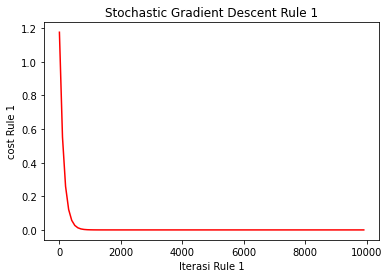

In [89]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Stochastic Gradient Descent Rule 1")
plt.plot(s_iterasi_rule1_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [90]:
s_cost_rule1

7.703719777548943e-28

In [91]:
s_b0_rule1

-0.5745707569259659

In [92]:
s_bpoly_rule1 #hasil untuk x1 dan x2

array([0.53298436, 0.72639488])

In [93]:
data_rule_1

BOD    DO    TSS
0   2.84  8.67  10.80
3   2.51  8.29   7.70
5   3.50  8.10   6.20
6   2.07  7.49   6.15
11  2.94  7.78   6.25
14  4.10  7.20  10.85
19  3.72  7.90   5.60
21  3.12  8.07   4.25
22  2.24  7.98   6.95
25  3.62  8.38   4.91

In [94]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

array([[2.84, 8.67],
       [2.51, 8.29],
       [3.5 , 8.1 ],
       [2.07, 7.49],
       [2.94, 7.78],
       [4.1 , 7.2 ],
       [3.72, 7.9 ],
       [3.12, 8.07],
       [2.24, 7.98],
       [3.62, 8.38]])

In [95]:
Y1=np.array(data_rule_1.iloc[:,2])  #mengambil angka dari kolom
Y1

array([10.8 ,  7.7 ,  6.2 ,  6.15,  6.25, 10.85,  5.6 ,  4.25,  6.95,
        4.91])

In [96]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

BOD    DO    TSS       pred
0   2.84  8.67  10.80  10.306758
3   2.51  8.29   7.70   7.999355
5   3.50  8.10   6.20   5.166625
6   2.07  7.49   6.15   6.179585
11  2.94  7.78   6.25   5.761874
14  4.10  7.20  10.85  11.041976
19  3.72  7.90   5.60   5.126398
21  3.12  8.07   4.25   5.701848
22  2.24  7.98   6.95   6.791582
25  3.62  8.38   4.91   5.584000

##Rule 2


In [97]:
# Rule 2
rule_2 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Turun maka Y Keruh"]
index=rule_2.index

data_rule_2=df_fuzz.iloc[index,:3]
data_rule_2

BOD    DO    TSS
4   5.38  8.48   8.50
7   4.75  7.76  10.35
10  5.92  8.68   4.00
12  4.50  8.33   9.20
13  5.05  7.08   8.90
24  4.63  7.47  10.10
66  4.50  8.10  10.50
67  4.70  7.20   7.80
68  4.56  7.10   9.12

In [98]:
data_rule_2.to_csv('hasilrule2.csv') 

###STOKASTIC GRADIENT DESCENT

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [105]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

Unnamed: 0   BOD    DO    TSS
0           4  5.38  8.48   8.50
1           7  4.75  7.76  10.35
2          10  5.92  8.68   4.00
3          12  4.50  8.33   9.20
4          13  5.05  7.08   8.90
5          24  4.63  7.47  10.10
6          66  4.50  8.10  10.50
7          67  4.70  7.20   7.80
8          68  4.56  7.10   9.12

In [106]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

BOD    DO    TSS
0  5.38  8.48   8.50
1  4.75  7.76  10.35
2  5.92  8.68   4.00
3  4.50  8.33   9.20
4  5.05  7.08   8.90
5  4.63  7.47  10.10
6  4.50  8.10  10.50
7  4.70  7.20   7.80
8  4.56  7.10   9.12

In [107]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('TSS',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['TSS'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.61971831, 0.875     ],
       [0.17605634, 0.425     ],
       [1.        , 1.        ],
       [0.        , 0.78125   ],
       [0.38732394, 0.        ],
       [0.0915493 , 0.24375   ],
       [0.        , 0.6375    ],
       [0.14084507, 0.075     ],
       [0.04225352, 0.0125    ]])

In [108]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([0.69230769, 0.97692308, 0.        , 0.8       , 0.75384615,
       0.93846154, 1.        , 0.58461538, 0.78769231])

In [109]:
def stochastic_gradient_descent_rule2(X2, y2, iterasi, learning_rate = 0.01):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x2 = X2[random_index]
        sample_y2 = y2[random_index]
        
        y2_pred = np.dot(bpoly_rule2, sample_x2.T) + b0_rule2                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule2_grad = -(2/n)*(sample_x2.T.dot(sample_y2-y2_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule2_grad = -(2/n)*np.sum(sample_y2-y2_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule2 in range(jumlah_variabel_rule2):
            bp_rule2=bpoly_rule2[jv_rule2]
            bp.append(bp_rule2)
        b_rule2=[b0_rule2]+bp
        
        cost_rule2 = np.mean(np.square(sample_y2-y2_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [111]:
import time
mulai_rule2 = time.time()
s_bpoly_rule2, s_b0_rule2, s_cost_rule2, s_b_rule2_list, s_cost_rule2_list, s_iterasi_rule2_list=stochastic_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        learning_rate = 0.01)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  3.1361420154571533


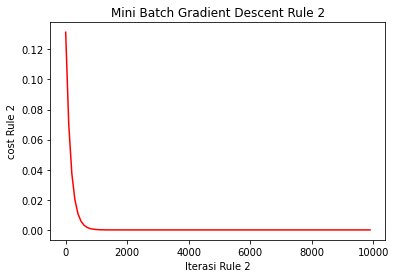

In [114]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(s_iterasi_rule2_list,s_cost_rule2_list, color='red', label='Eror')
plt.show()

In [113]:
s_cost_rule2

2.6273998524517324e-28

In [115]:
s_b0_rule2

0.25774913898455926

In [116]:
s_bpoly_rule2 #hasil untuk x1 dan x2

array([1.        , 1.16431508])

In [117]:
data_rule_2

BOD    DO    TSS
4   5.38  8.48   8.50
7   4.75  7.76  10.35
10  5.92  8.68   4.00
12  4.50  8.33   9.20
13  5.05  7.08   8.90
24  4.63  7.47  10.10
66  4.50  8.10  10.50
67  4.70  7.20   7.80
68  4.56  7.10   9.12

In [118]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

array([[5.38, 8.48],
       [4.75, 7.76],
       [5.92, 8.68],
       [4.5 , 8.33],
       [5.05, 7.08],
       [4.63, 7.47],
       [4.5 , 8.1 ],
       [4.7 , 7.2 ],
       [4.56, 7.1 ]])

In [119]:
Y2=np.array(data_rule_2.iloc[:,2])
Y2

array([ 8.5 , 10.35,  4.  ,  9.2 ,  8.9 , 10.1 , 10.5 ,  7.8 ,  9.12])

In [120]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

BOD    DO    TSS       pred
4   5.38  8.48   8.50   8.271480
7   4.75  7.76  10.35  10.456785
10  5.92  8.68   4.00   4.107654
12  4.50  8.33   9.20   9.606597
13  5.05  7.08   8.90   8.593864
24  4.63  7.47  10.10   9.869288
66  4.50  8.10  10.50  10.023450
67  4.70  7.20   7.80   9.104622
68  4.56  7.10   9.12   8.436260

##Rule 3

In [121]:
# Rule 3
rule_3 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tinggi dan X2 Turun maka Y Jernih"]
index=rule_3.index

data_rule_3=df_fuzz.iloc[index,:3]
data_rule_3

BOD    DO    TSS
8   4.67  8.17  15.20
9   4.50  7.78  11.65
16  4.97  7.16  16.45
46  5.55  8.45  14.98
47  4.67  7.93  16.21
48  6.34  7.10  13.75
49  5.71  8.31  18.10
50  6.30  7.27  17.90
51  4.98  7.39  15.87
52  5.76  7.78  12.32

In [122]:
data_rule_2.to_csv('hasilrule3.csv') 

###STOKASTIC GRADIENT DESCENT

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [131]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

Unnamed: 0   BOD    DO    TSS       pred
0           4  5.38  8.48   8.50   8.271480
1           7  4.75  7.76  10.35  10.456785
2          10  5.92  8.68   4.00   4.107654
3          12  4.50  8.33   9.20   9.606597
4          13  5.05  7.08   8.90   8.593864
5          24  4.63  7.47  10.10   9.869288
6          66  4.50  8.10  10.50  10.023450
7          67  4.70  7.20   7.80   9.104622
8          68  4.56  7.10   9.12   8.436260

In [132]:
df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
df_rule3

BOD    DO    TSS       pred
0  5.38  8.48   8.50   8.271480
1  4.75  7.76  10.35  10.456785
2  5.92  8.68   4.00   4.107654
3  4.50  8.33   9.20   9.606597
4  5.05  7.08   8.90   8.593864
5  4.63  7.47  10.10   9.869288
6  4.50  8.10  10.50  10.023450
7  4.70  7.20   7.80   9.104622
8  4.56  7.10   9.12   8.436260

In [133]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('TSS',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['TSS'].values.reshape(rule_3.shape[0],1))

scaled_X3

array([[0.0923913 , 0.79259259],
       [0.        , 0.5037037 ],
       [0.25543478, 0.04444444],
       [0.57065217, 1.        ],
       [0.0923913 , 0.61481481],
       [1.        , 0.        ],
       [0.6576087 , 0.8962963 ],
       [0.97826087, 0.12592593],
       [0.26086957, 0.21481481],
       [0.68478261, 0.5037037 ]])

In [134]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

array([0.5503876 , 0.        , 0.74418605, 0.51627907, 0.70697674,
       0.3255814 , 1.        , 0.96899225, 0.65426357, 0.10387597])

In [135]:
def stochastic_gradient_descent_rule3(X3, y3, iterasi, learning_rate = 0.01):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x3 = X3[random_index]
        sample_y3 = y3[random_index]
        
        y3_pred = np.dot(bpoly_rule3, sample_x3.T) + b0_rule3                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule3_grad = -(2/n)*(sample_x3.T.dot(sample_y3-y3_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule3_grad = -(2/n)*np.sum(sample_y3-y3_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule3 in range(jumlah_variabel_rule3):
            bp_rule3=bpoly_rule3[jv_rule3]
            bp.append(bp_rule3)
        b_rule3=[b0_rule3]+bp
        
        cost_rule3 = np.mean(np.square(sample_y3-y3_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [136]:
import time
mulai_rule3 = time.time()
s_bpoly_rule3, s_b0_rule3, s_cost_rule3, s_b_rule3_list, s_cost_rule3_list, s_iterasi_rule3_list=stochastic_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000,
                                                                                                                                        learning_rate = 0.01)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

Waktu Komputasi Rule 3:  2.78739595413208


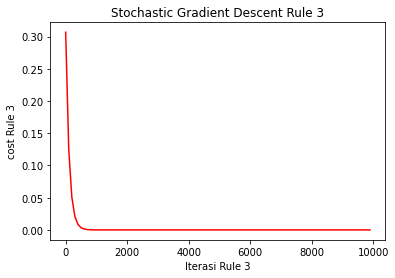

In [137]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Stochastic Gradient Descent Rule 3")
plt.plot(s_iterasi_rule3_list,s_cost_rule3_list, color='red', label='Eror')
plt.show()

In [138]:
s_cost_rule3

4.738095811983702e-29

In [139]:
s_b0_rule3

-0.24774394921029388

In [140]:
s_bpoly_rule3 #hasil untuk x1 dan x2

array([0.83708142, 0.77794802])

In [141]:
data_rule_3

BOD    DO    TSS
8   4.67  8.17  15.20
9   4.50  7.78  11.65
16  4.97  7.16  16.45
46  5.55  8.45  14.98
47  4.67  7.93  16.21
48  6.34  7.10  13.75
49  5.71  8.31  18.10
50  6.30  7.27  17.90
51  4.98  7.39  15.87
52  5.76  7.78  12.32

In [142]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

array([[4.67, 8.17],
       [4.5 , 7.78],
       [4.97, 7.16],
       [5.55, 8.45],
       [4.67, 7.93],
       [6.34, 7.1 ],
       [5.71, 8.31],
       [6.3 , 7.27],
       [4.98, 7.39],
       [5.76, 7.78]])

In [143]:
Y3=np.array(data_rule_3.iloc[:,2])
Y3

array([15.2 , 11.65, 16.45, 14.98, 16.21, 13.75, 18.1 , 17.9 , 15.87,
       12.32])

In [144]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

BOD    DO    TSS       pred
8   4.67  8.17  15.20  14.674465
9   4.50  7.78  11.65  13.938713
16  4.97  7.16  16.45  16.144015
46  5.55  8.45  14.98  16.634337
47  4.67  7.93  16.21  14.241251
48  6.34  7.10  13.75  15.747410
49  5.71  8.31  18.10  15.978115
50  6.30  7.27  17.90  15.102638
51  4.98  7.39  15.87  15.207596
52  5.76  7.78  12.32  14.761460

#Prediksi

In [145]:
df_pred=pd.concat([data_rule_1,data_rule_2,data_rule_3], ignore_index=False)
df_pred.sort_index()

BOD    DO    TSS       pred
0   2.84  8.67  10.80  10.306758
3   2.51  8.29   7.70   7.999355
4   5.38  8.48   8.50   8.271480
5   3.50  8.10   6.20   5.166625
6   2.07  7.49   6.15   6.179585
7   4.75  7.76  10.35  10.456785
8   4.67  8.17  15.20  14.674465
9   4.50  7.78  11.65  13.938713
10  5.92  8.68   4.00   4.107654
11  2.94  7.78   6.25   5.761874
12  4.50  8.33   9.20   9.606597
13  5.05  7.08   8.90   8.593864
14  4.10  7.20  10.85  11.041976
16  4.97  7.16  16.45  16.144015
19  3.72  7.90   5.60   5.126398
21  3.12  8.07   4.25   5.701848
22  2.24  7.98   6.95   6.791582
24  4.63  7.47  10.10   9.869288
25  3.62  8.38   4.91   5.584000
46  5.55  8.45  14.98  16.634337
47  4.67  7.93  16.21  14.241251
48  6.34  7.10  13.75  15.747410
49  5.71  8.31  18.10  15.978115
50  6.30  7.27  17.90  15.102638
51  4.98  7.39  15.87  15.207596
52  5.76  7.78  12.32  14.761460
66  4.50  8.10  10.50  10.023450
67  4.70  7.20   7.80   9.104622
68  4.56  7.10   9.12   8.436260

In [146]:
df_pred.to_excel('hasil_prediksi.xlsx') 

In [147]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_BOD','miu_DO']].min(axis=1)
df_fuzz

BOD     DO  ...                                      Rule alpha_predikat
0   2.84   8.67  ...  Jika X1 Rendah dan X2 Turun maka Y Keruh       0.166667
1   2.98   8.77  ...  Jika X1 Rendah dan X2 Naik maka Y Jernih       0.196970
2   3.19   9.37  ...   Jika X1 Rendah dan X2 Naik maka Y Keruh       0.242424
3   2.51   8.29  ...  Jika X1 Rendah dan X2 Turun maka Y Keruh       0.095238
4   5.38   8.48  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.283550
..   ...    ...  ...                                       ...            ...
64  4.11  10.34  ...  Jika X1 Rendah dan X2 Naik maka Y Jernih       0.023952
65  2.67  10.02  ...  Jika X1 Rendah dan X2 Naik maka Y Jernih       0.119760
66  4.50   8.10  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.305389
67  4.70   7.20  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.035928
68  4.56   7.10  ...  Jika X1 Tinggi dan X2 Turun maka Y Keruh       0.005988

[69 rows x 11 columns]

In [148]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

BOD     DO  ...  alpha_predikat y_pred_regressi
0   2.84   8.67  ...        0.166667       10.306758
1   2.98   8.77  ...        0.196970             NaN
2   3.19   9.37  ...        0.242424             NaN
3   2.51   8.29  ...        0.095238        7.999355
4   5.38   8.48  ...        0.283550        8.271480
..   ...    ...  ...             ...             ...
64  4.11  10.34  ...        0.023952             NaN
65  2.67  10.02  ...        0.119760             NaN
66  4.50   8.10  ...        0.305389       10.023450
67  4.70   7.20  ...        0.035928        9.104622
68  4.56   7.10  ...        0.005988        8.436260

[69 rows x 12 columns]

In [149]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

BOD     DO    TSS  ... alpha_predikat y_pred_regressi  Pred TSK
0   2.84   8.67  10.80  ...       0.166667       10.306758  1.717793
1   2.98   8.77  16.20  ...       0.196970             NaN       NaN
2   3.19   9.37  10.35  ...       0.242424             NaN       NaN
3   2.51   8.29   7.70  ...       0.095238        7.999355  0.761843
4   5.38   8.48   8.50  ...       0.283550        8.271480  2.345376
..   ...    ...    ...  ...            ...             ...       ...
64  4.11  10.34  17.87  ...       0.023952             NaN       NaN
65  2.67  10.02  14.12  ...       0.119760             NaN       NaN
66  4.50   8.10  10.50  ...       0.305389       10.023450  3.061054
67  4.70   7.20   7.80  ...       0.035928        9.104622  0.327112
68  4.56   7.10   9.12  ...       0.005988        8.436260  0.050517

[69 rows x 13 columns]

In [150]:
x1= df_fuzz.index
y1= df_fuzz.TSS
y2= df_fuzz['Pred TSK']

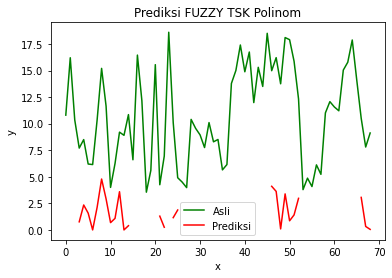

In [151]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi FUZZY TSK Polinom')
plt.legend()
plt.show()